## Step 1: Data Cleaning

In [2]:
import pandas as pd

df = pd.read_csv("/content/heart_disease_uci.csv")  # Assuming you downloaded and renamed the dataset
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs         

In [3]:
# Drop columns with excessive missing values
df_cleaned = df.drop(columns=['ca', 'thal'])

# Impute missing numerical columns with median
num_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']
for col in num_cols:
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Impute missing categorical columns with mode
cat_cols = ['fbs', 'restecg', 'exang', 'slope']
for col in cat_cols:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

# Confirm no missing values remain
missing_after_cleaning = df_cleaned.isnull().sum()
missing_after_cleaning[missing_after_cleaning > 0]

<ipython-input-3-b988b7998569>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
<ipython-input-3-b988b7998569>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

,0


In [4]:
print(df_cleaned.isnull().sum())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64


## Step 2: Exploratory Data Analysis (EDA)

In [5]:
print(df.describe())

               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000

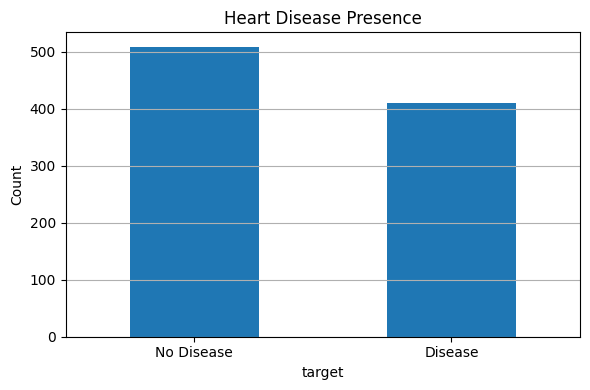

In [6]:
import matplotlib.pyplot as plt

# Simplify the target: 0 = No Disease, 1 = Disease (binary classification)
df_cleaned['target'] = (df_cleaned['num'] > 0).astype(int)

# Plot target distribution
plt.figure(figsize=(6, 4))
df_cleaned['target'].value_counts().plot(kind='bar')
plt.title('Heart Disease Presence')
plt.xticks(ticks=[0, 1], labels=['No Disease', 'Disease'], rotation=0)
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

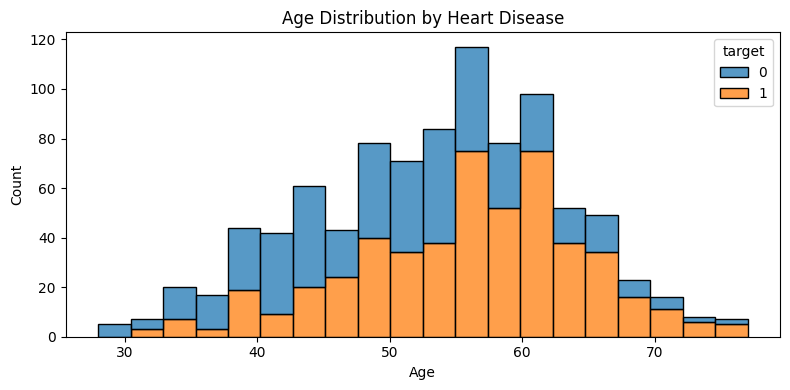

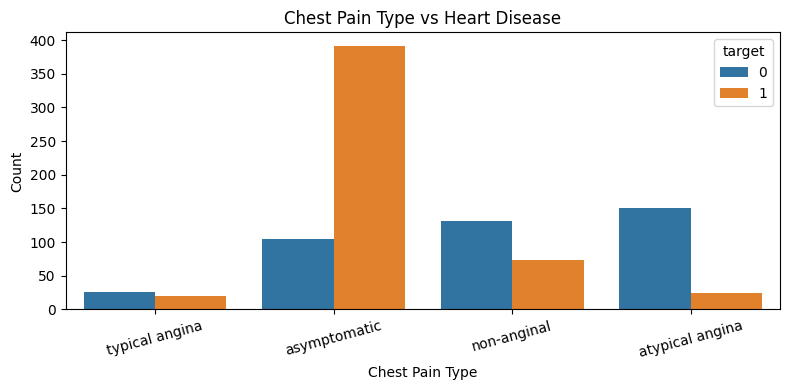

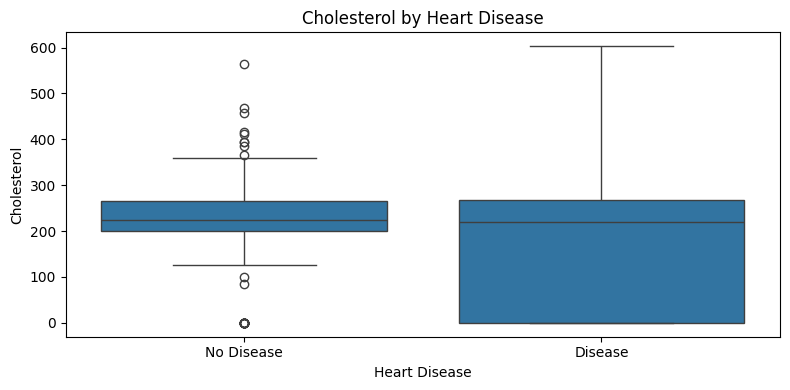

In [7]:
import seaborn as sns

# Age distribution by heart disease
plt.figure(figsize=(8, 4))
sns.histplot(data=df_cleaned, x='age', hue='target', multiple='stack', bins=20)
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Chest pain type vs heart disease
plt.figure(figsize=(8, 4))
sns.countplot(data=df_cleaned, x='cp', hue='target')
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Cholesterol levels by heart disease
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_cleaned, x='target', y='chol')
plt.title('Cholesterol by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.tight_layout()
plt.show()

## Step 3: Model Training

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Prepare features and target
X = df_cleaned.drop(columns=['id', 'num', 'target'])
y = df_cleaned['target']

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include='object').columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'  # keep numerical features as-is
)

# Create pipeline with logistic regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=2000))
])

# Train model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Accuracy and Confusion Matrix
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

In [9]:
print("Model Accuracy: ", acc)
print("Confusion Matrix: ", cm)
print("ROC AUC Score: ", roc_auc)

Model Accuracy:  0.8206521739130435
Confusion Matrix:  [[59 16]
 [17 92]]
ROC AUC Score:  0.8987155963302753


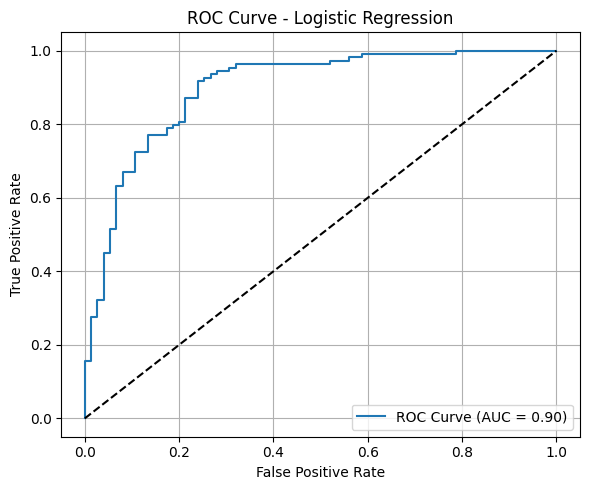

In [10]:
# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

In [14]:
# Extract feature names from the preprocessing step
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
model_coefficients = pipeline.named_steps['classifier'].coef_[0]

# Combine feature names and coefficients
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model_coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(feature_importance)

                          Feature  Coefficient
2        cat__dataset_Switzerland     2.373072
4         cat__cp_atypical angina    -1.709470
0                   cat__sex_Male     1.515335
6          cat__cp_typical angina    -1.216013
5             cat__cp_non-anginal    -1.169627
16               remainder__exang     0.964086
9                 cat__slope_flat     0.803648
17             remainder__oldpeak     0.685226
1            cat__dataset_Hungary    -0.505288
14                 remainder__fbs     0.361992
8   cat__restecg_st-t abnormality     0.175477
10           cat__slope_upsloping     0.034163
7             cat__restecg_normal     0.032298
3      cat__dataset_VA Long Beach     0.030276
11                 remainder__age     0.019201
15              remainder__thalch    -0.007833
12            remainder__trestbps     0.001311
13                remainder__chol     0.000605
